# Final Project Report

* Class: DS 5100
* Student Name: Zach Stautzenbach
* Student Net ID: ehe5bn
* This URL: https://github.com/Zach0411/ds5100-finalproject-ehe5bn/blob/main/DS5100_FinalProjectTemplate.ipynb

# Instructions

Follow the instructions in the Final Project isntructions notebook and put evidence of your work in this notebook.

Total points for each subsection under **Deliverables** and **Scenarios** are given in parentheses.

Breakdowns of points within subsections are specified within subsection instructions as bulleted lists.

This project is worth **50 points**.

# Deliverables

## The Monte Carlo Module (10)

- URL included, appropriately named (1).
- Includes all three specified classes (3).
- Includes at least all 12 specified methods (6; .5 each).

Put the URL to your GitHub repo here.

Repo URL: https://github.com/Zach0411/ds5100-finalproject-ehe5bn/tree/main

Paste a copy of your module here.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

```python 

import pandas as pd
import numpy as np

class Die():
    '''Purpose: The purpose of the Die class is to create a "die" object with N number of sides and W weights.
    Weights can be changed but default to 1 for each face and are a positive number (a float or an integer). Each side contains a unique symbol. This die object is created to be rolled one or more times.'''
    
    def __init__(self, array):
        '''To initialize Die class, input required is a numpy array of strings or numbers. Values in array must be distinct. This will save die attributes in a dataframe with weights defaulting to 1.'''
        #make sure input was an array
        if not isinstance(array, np.ndarray):
            raise TypeError("Input must be a numpy array.")
            
        #make sure values are distinct
        if len(array) != len(set(array)):
            raise ValueError("Values in the array must be distinct.")
            
        #initialize faces
        self.faces = array
        
        #weights of one for each face
        self.weights = np.ones(len(array))
        
        #save to a dataframe
        self.df_die = pd.DataFrame(array, index = self.weights)
        
    def change_weight(self, face, new_weight):
        '''Purpose: change weight of any face of the die object
        
        Parameters: change_weight(face, new_weight)
        face: input existing face to change weight of
        new_weight: adjust weight of face by inputing integer or float
        '''
        if face not in self.faces:
            raise IndexError("Face value does not exist")
        if type(new_weight) != int and type(new_weight) != float:
            raise TypeError("New Weight must be numeric")
        else:
            self.weights[np.where(self.faces == face)] = new_weight #changes weight based on index
    
    def roll_die(self, num_rolls = 1):
        '''Purpose: To roll created die object N number of times
        
        Parameters: roll_die(num_rolls=1) **defaults to one
        num_rolls (optional): can specify number of rolls for the die to make
        
        Returns: a list of results of the outcome(s)
        '''
        self.num_rolls = num_rolls
        results = []
        #set probabilities based on weights
        self.my_probs = [i/sum(self.weights) for i in self.weights]
        #Roll die based on number of rolls and weights
        for i in range(self.num_rolls):
            result = self.df_die.sample(weights=self.weights).values[0]
            results_list = list(result)
            results.extend(results_list)
        return results
    
    def current_state(self):
        '''Purpose: return an updated dataframe of the faces of the die object and the corresponding weights
        
        Parameters: current_state()
        No parameters, however, requires existing die object to have been created
        
        Returns: a dataframe of the updated die object
        '''
        return self.df_die.copy()
        
class Game():
    '''Purpose: Roll one or more similar dice (die objects) of same number of sides and associated faces.
    
    Parameters: Game(list of dice)
    Requires a list of die objects to be rolled'''
    
    def __init__(self, dice_list):
        '''Purpose: inializes die objects to be rolled
        
        Parameters: Game(dice_list)
        dice_list represents a list of previously created die objects from the Die Class.'''
    
        self.dice_list = dice_list #must be a list of similar dice

    def play_game(self, num_rolls):
        '''Purpose: Specify number of times the dice should be rolled
        
        Parameters: play_game(num_rolls):
        num_rolls: Requires a positive integer input
        
        Saves die to a private dataframe, use show_result() to return results.'''
        if type(num_rolls) != int:
            raise ValueError('Must be an integer for number of rolls')
        else:
            self.rolls = num_rolls
        self.rolls_outcome = [die.roll_die(num_rolls) for die in self.dice_list]
        self.df_game = pd.DataFrame(self.rolls_outcome).T
        self.df_game.index.name = 'n'
        self.df_game.index += 1

    def show_results(self, choice='wide'):
        '''Purpose: Show results of rolled dice in a dataframe
        
        Parameters: show_result(choice='wide'), default to wide
        Option: choose 'narrow' to recieve dataframe in narrow form
        
        Returns: specified dataframe of results of game played (dice rolled)
        '''
        copy = self.df_game.copy()
        if choice == 'wide':
            return copy
        elif choice == 'narrow':
            narrow = copy.stack()
            narrow2 = copy.stack().to_frame()         
            return  narrow2 #change to narrow
        else:
            raise ValueError("Must choose between 'wide' or 'narrow'")

            
class Analyzer():
    '''Purpose: This class contains multiple function to compute descriptive statistics of games played.
    
    Requirement: Requires game object to be initiated.
    '''
    def __init__(self, play): #initializes game to analyze
        '''Purpose: initialize Analyzer class with Game object
        
        Parameters: Analyzer(play)
        play: a Game object created
        '''
        if not isinstance(play, Game):
            raise ValueError("Input must be a Game object")
        else:
            self.play = play

    def jackpot(self):
        '''Purpose: Computes how many times Game resulted in jackpot (all of the same faces rolled)
        
        Parameters: None
        
        Returns: Integer number of jackkpots
        '''
        counter = 0
        y = self.play.show_results().T
        for i in y:
            if y[i].nunique() == 1:
                counter += 1
        y = print('Jackpots:', int(counter))
        return y

    def face_counts(self):
        '''Purpose: Computes how many times a face was rolled in each event.
        
        Parameters: None
        
        Returns: A wide dataframe of results with index as roll number, 
        face values as column headers, count of face values in the cells.
        '''
        face_values = self.play.dice_list[0].faces.tolist()
        roll_counts = []
        for roll in self.play.show_results().values:
            roll_count = {face: roll.tolist().count(face) for face in face_values}
            roll_counts.append(roll_count)
        
        df_counts = pd.DataFrame(roll_counts)
        df_counts.index.name = 'Roll'
        df_counts.index += 1
        return df_counts

    def combos(self):
        '''Purpose: Compute distinct combinations of faces rolled along with the counts, order independdent.
        
        Parameters: None
        
        Returns: Dataframe in wide format of with multiindex of distinct combinations and a column of
        associated counts.
        '''
        z = self.play.show_results().copy() #brings dataframe of results
        t = pd.DataFrame(np.sort(z.values, axis=1), columns=z.columns).value_counts().reset_index(name='counts')
        t_newindex = t.set_index([c for c in t.columns if c != 'counts'])
        return t_newindex
    
    def permutation(self):
        '''Purpose: Computes the distinct permutations of faces rolled, along with their counts, order
        dependent.
        
        Parameters: None
        
        Returns: Dataframe in wide format of with multiindex of distinct permutations and a column of
        associated counts.
        '''
        c = self.play.show_results().copy()
        c_perms = c.value_counts().to_frame()
        return c_perms
```

## Unitest Module (2)

Paste a copy of your test module below.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

- All methods have at least one test method (1).
- Each method employs one of Unittest's Assert methods (1).

```python
import unittest
import pandas as pd
import numpy as np
from montecarlo.montecarlo import Die, Game, Analyzer

class montecarloTest(unittest.TestCase):
    
    def test_dataframe(self):
        a = np.array([1,2,3])
        object1 = Die(a)
        self.assertIsInstance(object1.df_die, pd.DataFrame)
        
    def test_weight(self):
        a = np.array([1,2,3])
        object1 = Die(a)
        object1.change_weight(1,90)
        x = object1.current_state()
        z = x.reset_index()
        c = z.values[0,0]
        self.assertEqual(90, c)
        
    def test_roll_die(self):
        a = np.array([1,2,3])
        object1 = Die(a)
        x = len(object1.roll_die(2))
        y = 2
        self.assertEqual(x,y)
        
    def test_current_state(self):
        a = np.array([1,2,3])
        object1 = Die(a)
        object1.change_weight(1,90)
        x = object1.current_state()
        df3 = pd.DataFrame(
            columns=[0], 
            index=[90,1.0,1.0], 
            data=[[1],[2],[3]])
        self.assertTrue(x.equals(df3))
        
    def test_game_in(self):
        a = np.array([1,2,3,4,5,6])
        b = np.array([1,2,3,4,5,6])
        object4 = Die(a)
        object5 = Die(b)
        dice_list = [object4, object5]
        game1 = Game(dice_list)
        self.assertEqual(type(game1.dice_list), list)
        
    def test_playinggame(self):
        a = np.array([1,2,3,4,5,6])
        b = np.array([1,2,3,4,5,6])
        object4 = Die(a)
        object5 = Die(b)
        dice_list = [object4, object5]
        game1 = dice_list
        game1 = Game(dice_list)
        game1.play_game(3)
        game1.show_results()
        x = len(game1.show_results())
        self.assertTrue(x == 3)
        
        
    def test_showresults(self):
        a = np.array([1,2,3,4,5,6])
        b = np.array([1,2,3,4,5,6])
        object4 = Die(a)
        object5 = Die(b)
        dice_list = [object4, object5]
        game2 = Game(dice_list)
        game2.play_game(3)
        x = game2.show_results()
        row_count = len(x)
        y = 3
        self.assertEqual(row_count, y)
        
    def test_init_analyzer(self):
        a = np.array([1,2,3])
        Die1 = Die(a)
        dice_list = [Die1,Die1]
        Jgame = Game(dice_list)
        Jgame.play_game(3)
        Janalyzer = Analyzer(Jgame)
        self.assertIsInstance(Jgame, Game)
        
    
    def test_jackpot(self):
        a = np.array([1,2,3])
        Die1 = Die(a)
        Die1.change_weight(1,90)
        Die1.change_weight(2,0)
        Die1.change_weight(3,0)
        dice_list = [Die1,Die1]
        Jgame = Game(dice_list)
        Jgame.play_game(3)
        Janalyzer = Analyzer(Jgame)
        Janalyzer.jackpot()
        b = print('Jackpots:', int(3))
        self.assertEqual(b, Janalyzer.jackpot())
        
    def test_face_counts(self):
        a = np.array([1,2,3])
        Die1 = Die(a)
        Die1.change_weight(1,90)
        Die1.change_weight(2,0)
        Die1.change_weight(3,0)
        dice_list = [Die1,Die1]
        Jgame = Game(dice_list)
        Jgame.play_game(3)
        Janalyzer = Analyzer(Jgame)
        Janalyzer.face_counts()
        y = 3
        self.assertEqual(y, len(Janalyzer.face_counts()))
        
    def test_combos(self):
        a = np.array([1,2])
        Die1 = Die(a)
        Die2 = Die(a)
        dice_list = [Die1,Die2]
        Jgame = Game(dice_list)
        Jgame.play_game(40)
        Janalyzer = Analyzer(Jgame)
        x2 = Janalyzer.combos().copy()
        y = 3
        self.assertTrue(len(x2) <= y)
        
        
    def test_permutations(self):
        a = np.array([1,2])
        Die1 = Die(a)
        Die2 = Die(a)
        dice_list = [Die1,Die2]
        Jgame = Game(dice_list)
        Jgame.play_game(40)
        Janalyzer = Analyzer(Jgame)
        x2 = Janalyzer.permutation().copy()
        y = 4
        self.assertTrue(len(x2) <= y)
        
if __name__ == '__main__':
    
    unittest.main(verbosity=3)
```

## Unittest Results (3)

Put a copy of the results of running your tests from the command line here.

Again, paste as text using triple backticks.

- All 12 specified methods return OK (3; .25 each).


```bash
Your montecarlo package has been imported!
test_combos (__main__.montecarloTest.test_combos) ... ok
test_current_state (__main__.montecarloTest.test_current_state) ... ok
test_dataframe (__main__.montecarloTest.test_dataframe) ... ok
test_face_counts (__main__.montecarloTest.test_face_counts) ... ok
test_game_in (__main__.montecarloTest.test_game_in) ... ok
test_init_analyzer (__main__.montecarloTest.test_init_analyzer) ... ok
test_jackpot (__main__.montecarloTest.test_jackpot) ... Jackpots: 3
Jackpots: 3
Jackpots: 3
ok
test_permutations (__main__.montecarloTest.test_permutations) ... ok
test_playinggame (__main__.montecarloTest.test_playinggame) ... ok
test_roll_die (__main__.montecarloTest.test_roll_die) ... ok
test_showresults (__main__.montecarloTest.test_showresults) ... ok
test_weight (__main__.montecarloTest.test_weight) ... ok

----------------------------------------------------------------------
Ran 12 tests in 0.074s

OK
```

## Import (1)

Import your module here. This import should refer to the code in your package directory.

- Module successuflly imported (1).

In [3]:
# e.g. import montecarlo.montecarlo 
from montecarlo.montecarlo import Die, Game, Analyzer

## Help Docs (4)

Show your docstring documentation by applying `help()` to your imported module.

- All methods have a docstring (3; .25 each).
- All classes have a docstring (1; .33 each).

In [43]:
# help(montecarlo)
help(montecarlo.montecarlo)

Help on module montecarlo.montecarlo in montecarlo:

NAME
    montecarlo.montecarlo - # Montecarlo Project

CLASSES
    builtins.object
        Analyzer
        Die
        Game
    
    class Analyzer(builtins.object)
     |  Analyzer(play)
     |  
     |  Purpose: This class contains multiple function to compute descriptive statistics of games played.
     |  
     |  Requirement: Requires game object to be initiated.
     |  
     |  Methods defined here:
     |  
     |  __init__(self, play)
     |      Purpose: initialize Analyzer class with Game object
     |      
     |      Parameters: Analyzer(play)
     |      play: a Game object created
     |  
     |  combos(self)
     |      Purpose: Compute distinct combinations of faces rolled along with the counts, order independdent.
     |      
     |      Parameters: None
     |      
     |      Returns: Dataframe in wide format of with multiindex of distinct combinations and a column of
     |      associated counts.
     |  
 

## `README.md` File (3)

Provide link to the README.md file of your project's repo.

- Metadata section or info present (1).
- Synopsis section showing how each class is called (1). (All must be included.)
- API section listing all classes and methods (1). (All must be included.)

URL: https://github.com/Zach0411/ds5100-finalproject-ehe5bn/blob/main/README.md

## Successful installation (2)

Put a screenshot or paste a copy of a terminal session where you successfully install your module with pip.

If pasting text, use a preformatted text block to show the results.

- Installed with `pip` (1).
- Successfully installed message appears (1).

```bash
-bash-4.4$pip install -e .
Defaulting to user installation because normal site-packages is not writeable
Obtaining file:///sfs/qumulo/qhome/ehe5bn/Documents/MSDS/DS5100/ds5100-finalproject-ehe5bn
  Preparing metadata (setup.py) ... done
Installing collected packages: montecarlotest
  Running setup.py develop for montecarlotest
Successfully installed montecarlotest-1.0.0
```

# Scenarios

Use code blocks to perform the tasks for each scenario.

Be sure the outputs are visible before submitting.

## Scenario 1: A 2-headed Coin (9)

Task 1. Create a fair coin (with faces $H$ and $T$) and one unfair coin in which one of the faces has a weight of $5$ and the others $1$.

- Fair coin created (1).
- Unfair coin created with weight as specified (1).

In [48]:
coin = np.array(['H','T'])
Fair_coin = Die(coin)
Unfair_coin = Die(coin)
Unfair_coin.change_weight('H', 5)

Task 2. Play a game of $1000$ flips with two fair dice.

- Play method called correclty and without error (1).

In [80]:
fair_list = [Fair_coin, Fair_coin]
game1 = Game(fair_list)
game1.play_game(1000)

Task 3. Play another game (using a new Game object) of $1000$ flips, this time using two unfair dice and one fair die. For the second unfair die, you can use the same die object twice in the list of dice you pass to the Game object.

- New game object created (1).
- Play method called correclty and without error (1).

In [83]:
dice_list2 = [Fair_coin, Unfair_coin, Unfair_coin]
game2 = Game(dice_list2)
game2.play_game(1000)

Task 4. For each game, use an Analyzer object to determine the raw frequency of jackpots — i.e. getting either all $H$s or all $T$s.

- Analyzer objecs instantiated for both games (1).
- Raw frequencies reported for both (1).

In [88]:
details_game2 = Analyzer(game1)
details_game2.jackpot()

Jackpots: 528


In [98]:
details_game1 = Analyzer(game2)
details_game1.jackpot()

Jackpots: 370


Task 5. For each analyzer, compute relative frequency as the number of jackpots over the total number of rolls.

- Both relative frequencies computed (1).

In [92]:
game1_rf = 370/1000

In [90]:
game2_rf = 528/1000

Task 6. Show your results, comparing the two relative frequencies, in a simple bar chart.

- Bar chart plotted and correct (1).

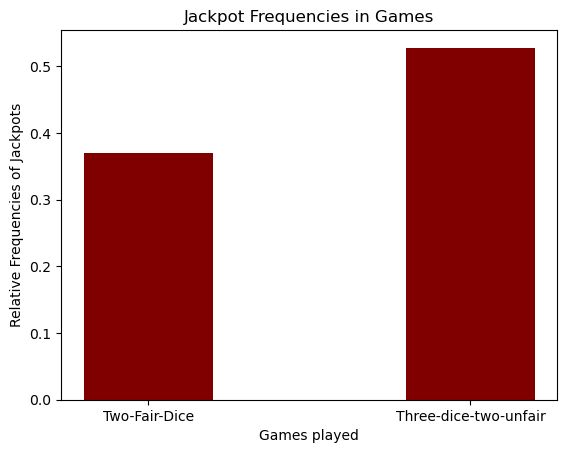

In [96]:
import matplotlib.pyplot as plt 
data = {'Two-Fair-Dice': game1_rf, 'Three-dice-two-unfair': game2_rf}
dice = list(data.keys())
values = list(data.values())
plt.bar(dice, values, color ='maroon', 
        width = 0.4)
plt.xlabel("Games played")
plt.ylabel("Relative Frequencies of Jackpots")
plt.title("Jackpot Frequencies in Games")
plt.show()

## Scenario 2: A 6-sided Die (9)

Task 1. Create three dice, each with six sides having the faces 1 through 6.

- Three die objects created (1).

In [17]:
import pandas as pd
import numpy as np
a = np.array([1,2,3,4,5,6])
b = np.array([1,2,3,4,5,6])
c = np.array([1,2,3,4,5,6])
Die1 = Die(a) #weight of 6 is 5
Die2 = Die(b) #weight of 1 is 5
Die3 = Die(c) #fair die

Task 2. Convert one of the dice to an unfair one by weighting the face $6$ five times more than the other weights (i.e. it has weight of 5 and the others a weight of 1 each).

- Unfair die created with proper call to weight change method (1).

In [34]:
Die1.change_weight(6, 5)


Task 3. Convert another of the dice to be unfair by weighting the face $1$ five times more than the others.

- Unfair die created with proper call to weight change method (1).

In [35]:
Die2.change_weight(1, 5)

Task 4. Play a game of $10000$ rolls with $5$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [36]:
Fair_dice = [Die3, Die3, Die3, Die3, Die3]
task4game = Game(Fair_dice)
task4game.play_game(10000)

Task 5. Play another game of $10000$ rolls, this time with $2$ unfair dice, one as defined in steps #2 and #3 respectively, and $3$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [37]:
Mixed_dice = [Die1,Die2,Die3,Die3,Die3]
task5game = Game(Mixed_dice)
task5game.play_game(10000)

Task 6. For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.

- Jackpot methods called (1).
- Graph produced (1).

In [38]:
#Analyzing task 4 game
task4_data = Analyzer(task4game)
task4_data.jackpot()

Jackpots: 11


In [39]:
#Analyzing task 5 game
task5_data = Analyzer(task5game)
task5_data.jackpot()

Jackpots: 1


In [40]:
#frequencies
task4_freq = 11/1000
task5_freq = 1/1000

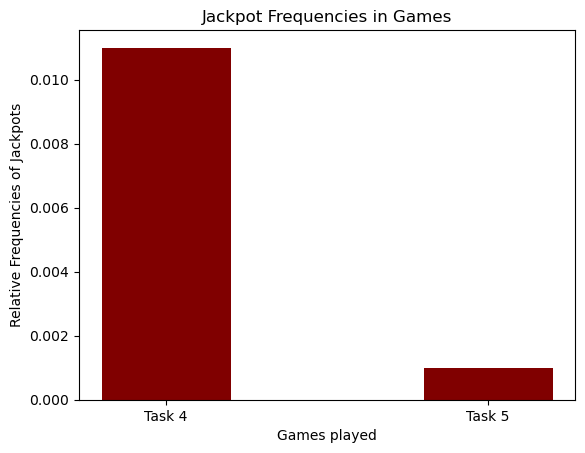

In [41]:
#graph
import matplotlib.pyplot as plt 
data = {'Task 4': task4_freq, 'Task 5': task5_freq}
dice = list(data.keys())
values = list(data.values())
plt.bar(dice, values, color ='maroon', 
        width = 0.4)
plt.xlabel("Games played")
plt.ylabel("Relative Frequencies of Jackpots")
plt.title("Jackpot Frequencies in Games")
plt.show()

## Scenario 3: Letters of the Alphabet (7)

Task 1. Create a "die" of letters from $A$ to $Z$ with weights based on their frequency of usage as found in the data file `english_letters.txt`. Use the frequencies (i.e. raw counts) as weights.

- Die correctly instantiated with source file data (1).
- Weights properly applied using weight setting method (1).

In [341]:
#Creating Die with letters
letters = np.array(['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P',
                    'Q','R','S','T','U','V','W','X','Y','Z'])
let_freq = pd.read_csv('english_letters.txt',header=None)
let_freq[['Letter', 'Weight']] = let_freq[0].str.split(' ', expand=True)
let_freq2 = let_freq.drop(0, axis = 1)
let_freq3 = let_freq2.sort_values('Letter')
let_freq3['Weight']= let_freq3['Weight'].astype(int)

In [342]:
#Applying weights
die_letters = Die(letters)
let_freq3.apply(lambda x: die_letters.change_weight(x['Letter'], x['Weight']), axis=1)
die_letters.current_state()

,0
374061888.0,A
70195826.0,B
138416451.0,C
169330528.0,D
529117365.0,E
95422055.0,F
91258980.0,G
216768975.0,H
320410057.0,I
9613410.0,J


Task 2. Play a game involving $4$ of these dice with $1000$ rolls.

- Game play method properly called (1).

In [343]:
letters_dice = [die_letters, die_letters, die_letters, die_letters]
LettersGame = Game(letters_dice)
LettersGame.play_game(1000)

Task 3. Determine how many permutations in your results are actual English words, based on the vocabulary found in `scrabble_words.txt`.

- Use permutation method (1).
- Get count as difference between permutations and vocabulary (1).

In [344]:
#Combine letters rolled for each roll
Scen3info = Analyzer(LettersGame)
x = Scen3info.permutation()
y = x.reset_index()
y["Combined"] = y[0].astype(str) + y[1].astype(str) + y[2].astype(str) +y[3].astype(str)
y
#Convert dataframe to list
combined = y['Combined'].tolist()

In [379]:
#Importing Scrablle words, convert to list
scrabble = pd.read_csv('scrabble_words.txt',header=None)
scrabble.columns = ['Words']
words = scrabble['Words'].tolist()

#Compute Number of words
matches = len([key for key, val in enumerate(words) if val in set(combined)])
matches

49

Task 4. Repeat steps #2 and #3, this time with $5$ dice. How many actual words does this produce? Which produces more?

- Successfully repreats steps (1).
- Identifies parameter with most found words (1).

In [347]:
#Repeat of step 2:
task4 = [die_letters, die_letters, die_letters, die_letters, die_letters]
task4game = Game(task4)
task4game.play_game(1000)

In [367]:
task4info = Analyzer(task4game)
z = task4info.permutation()
p = z.reset_index()
p['Combined2'] = p[0].astype(str) + p[1].astype(str) + p[2].astype(str) +p[3].astype(str)+p[4].astype(str)
combined2 = p['Combined2'].tolist()

In [369]:
#Compute Number of words
matches2 = len([key for key, val in enumerate(words) if val in set(combined2)])
matches2

7

In [386]:
print('Number of scrabble words with four dice rolled(task 3): ', matches)
print('Number of scrabble words with five dice rolled(task 4):', matches2)
print('Conclusion: More words were found when rolling four dice.')

Number of scrabble words with four dice rolled(task 3):  49
Number of scrabble words with five dice rolled(task 4): 7
Conclusion: More words were found when rolling four dice.
